### Introduzione all'Animazione in Unity: Visione, Pipeline e Strumenti

#### 1. L'Evoluzione del Ruolo dell'Animatore

L'animazione nei videogiochi moderni non è più solo movimento; è **narrazione visiva**. La qualità visiva si sta avvicinando a quella cinematografica e il ruolo dell'animatore si è espanso: non riguarda solo il keyframing, ma anche il rigging (la creazione dello scheletro controllabile) e l'integrazione con il motore di gioco. Unity si propone come strumento ponte per creare scene fotorealistiche, hand-painted o cartoon, supportando sia animatori esperti che principianti.

#### 2. La Filosofia dell'Animazione ("Illusion of Life")

Dave Hunt (Technical Artist di Unity ed ex-Bungie) introduce il concetto citando i principi classici Disney ("The Illusion of Life"). Il punto chiave è che, indipendentemente dal mezzo (stop motion, claymation o digitale in Unity) e dalla dimensione del team (AAA o Indie), l'obiettivo rimane lo stesso: **dare credibilità e "vita" a oggetti inanimati**. L'approccio tecnico deve servire l'espressione creativa, permettendo iterazioni rapide e senza distruzioni del lavoro precedente.

#### 3. Pipeline di Produzione e Technical Art

Per produzioni ambiziose, non basta saper animare; serve una **pipeline solida**.

* **Iterazione Non-Distruttiva:** Il processo non è lineare. Spesso il design di un personaggio cambia (es. braccia troppo corte per impugnare un'arma). È fondamentale avere sistemi (come rig modulari procedurali) che permettano modifiche senza dover rifare tutto da zero.
* **Organizzazione:** In progetti con migliaia di file, l'ordine è vitale.
* **Naming Conventions:** Standardizzare i nomi di ossa e geometrie per facilitare la navigazione nella gerarchia.
* **Sandbox Scenes:** Lavorare in scene di test o in "Prefab Mode" per isolare le animazioni dal resto del gioco.

#### 4. Strumenti e Automazione in Unity

Il testo evidenzia strumenti specifici per migliorare il flusso di lavoro tra artisti e programmatori:

* **AssetPostprocessor:** Una classe C# fondamentale che permette di eseguire codice automaticamente all'importazione di un asset. Utile per verificare che i file rispettino gli standard del team o per applicare settaggi di importazione automatici.
* **Timeline & FBX Exporter:** Usare Unity per prototipare rapidamente sequenze cinematiche (Timeline) e poi esportarle verso software esterni (Maya/Blender) per il polishing finale.
* **Animation Rigging (IK):** Permette di modificare lo scheletro a runtime (mentre il gioco gira). Esempio: un personaggio che poggia la mano su un muro o afferra una maniglia. Questo aggiunge realismo fisico e interazione con l'ambiente che un'animazione statica non può dare.

#### 5. Panoramica del Sistema Unity

Il sistema di animazione di Unity (spesso chiamato Mecanim) offre:

* **Retargeting:** La capacità di applicare la stessa animazione (es. una camminata) su modelli 3D umanoidi diversi.
* **State Machines:** Gestione visiva delle transizioni tra stati (es. da "Idle" a "Run").
* **Layering & Masking:** Possibilità di animare parti del corpo separatamente (es. le gambe corrono, ma il busto spara).

---


### Importazione e Gestione delle Sorgenti di Animazione

#### 1. Le Sorgenti: Dal Motion Capture alle Librerie Online

Esistono due approcci principali per ottenere dati di animazione, distinti per budget e fedeltà:

* **Produzioni AAA (Motion Capture):** Si utilizzano attori con tute dotate di marker riflettenti e telecamere a infrarossi (es. sistemi Vicon o OptiTrack). I dati grezzi vengono puliti in software come MotionBuilder.
  * *Viso:* Per le espressioni facciali si usano marker dedicati sul volto dell'attore.
  * *Esempio:* I cortometraggi Unity *Adam*, *The Heretic* ed *Enemies* sono stati realizzati così.
  * *Soluzione Low-Cost:* È possibile usare un **iPhone con ARKit** per catturare le espressioni facciali direttamente in Unity (vedi il progetto *The Realtime Rascals*).

* **Produzioni Indie (Librerie):** Se non si ha accesso a uno studio di MoCap, si usano librerie come **Adobe Mixamo** o **Reallusion ActorCore**.
  * **Critical Workflow Note:** Quando scarichi da Mixamo per Unity, devi selezionare il formato **FBX for Unity** e, soprattutto, assicurarti che il personaggio sia in **T-Pose**. Senza la T-Pose, il sistema *Humanoid* di Unity non riuscirà a mappare correttamente lo scheletro.

#### 2. Il Ponte Tecnico: Esportazione dai DCC (Maya & Blender)

Uno degli errori più comuni è pensare che Unity legga i "controlli" complessi di Maya o Blender. Unity legge solo trasformazioni di ossa e mesh. Pertanto, il concetto chiave è il **Baking** (cuocere l'animazione).

* **Autodesk Maya:**
  * I rig di controllo (IK Handles, curve) non vengono esportati.
  * L'animazione deve essere "fatta al forno" (baked) sullo scheletro di deformazione.
  * **Workflow:** Seleziona la Root → Select Hierarchy → Export Selection (FBX). Nel pannello export, spunta **Bake Animation**.

* **Blender:**
  * È cruciale esportare solo ciò che serve per evitare file "sporchi".
  * **Settings consigliati:**
    * *Export:* "Visible Only" (nascondi luci, camere e rig di controllo).
    * *Armature:* Seleziona "Only Deform Bones" e disabilita **"Add Leaf Bones"** (quest'ultimo aggiunge ossa inutili alle estremità che confondono Unity).
    * *Bake Animation:* Assicurati che sia attivo per convertire i movimenti dei driver/IK in keyframes puri.

#### 3. Anatomia di un file FBX in Unity

Quando importi un FBX, Unity non vede un singolo oggetto, ma un container complesso. Ecco come interpretare la struttura che vedi nell'Inspector:

| Componente | Funzione Tecnica |
| --- | --- |
| **Mesh** | I dati puri (vertici, normali, UV). Non si vede in scena senza un Renderer. |
| **Geometry** | L'oggetto in scena che contiene lo *Skinned Mesh Renderer*. Questo componente lega la Mesh alle ossa (Skinning). |
| **Skeleton** | La gerarchia delle ossa (trasformazioni). Spesso nascosta, ma visibile se necessario (es. per attaccare un'arma alla mano). |
| **Avatar** | **Concetto Fondamentale.** È l'interfaccia che spiega a Unity come interpretare lo scheletro. Definisce se è *Generic* (ragno, porta) o *Humanoid* (bipede riutilizzabile). |
| **Animations** | Le clip di movimento incorporate nel file (es. *Run*, *Jump*). |

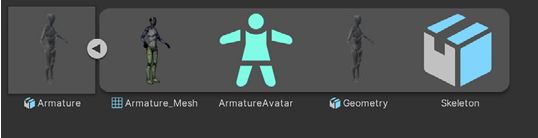

---

### FBX Import Settings & Animation Types

#### 1. Il "Centro di Controllo": L'Oggetto Root FBX

Quando clicchi su un file FBX nella finestra Project di Unity, l'Inspector non mostra l'oggetto in sé, ma le **Import Settings**. Questo è il pannello di controllo che decide come Unity interpreterà i dati grezzi del file.

È diviso in quattro schede fondamentali:

* **Model:** Impostazioni della mesh (scala, compressione, lettura/scrittura).
* **Rig:** Configurazione dello scheletro e del tipo di animazione.
* **Animation:** Gestione delle clip, timing e looping.
* **Materials:** Gestione delle texture e dei materiali importati.

#### 2. Il Grande Bivio: Generic vs. Humanoid

Unity gestisce l'animazione attraverso due sistemi principali, ognuno con caratteristiche e use case specifici:

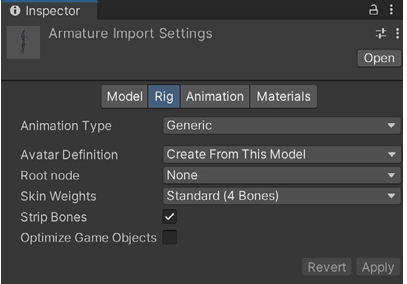

* **Humanoid:**
  * È una struttura universale per personaggi bipedi.
  * Astrae lo scheletro reale in uno scheletro virtuale standard.
  * Permette di condividere animazioni tra personaggi diversi (es. un orco usa la camminata di un elfo).

* **Generic:**
  * È l'impostazione di default quando importi un FBX.
  * È specifico per la struttura scheletrica di *quel* personaggio.
  * Le curve di animazione controllano direttamente posizione, rotazione e scala delle ossa originali.
  * **Quando usarlo:** Per creature non umanoidi (ragni, cavalli), oggetti meccanici (porte, leve), o quando vuoi animare direttamente in Unity usando la Forward Kinematics (FK) senza bisogno di retargeting.
  * **Limitazione:** Le animazioni "Generic" funzionano solo su personaggi che hanno *esattamente* la stessa gerarchia scheletrica.

#### 3. Gestione di File "Animation-Only"

Spesso, come nel tuo caso con Mixamo, hai un file per il modello e file separati per le animazioni.

* Anche i file che contengono solo animazioni vengono importati come **Generic** di default.
* Per farli funzionare correttamente, devono fare riferimento all'**Avatar** del file che contiene il personaggio originale. Questo assicura che l'animazione sappia quali ossa muovere.

#### 4. Editing delle Clip (Animation Tab)

Spesso un singolo file FBX contiene più movimenti in una lunga sequenza (es. frame 0-100 Idle, 101-200 Walk). Nella tab **Animation** puoi:

* **Definire nuove clip:** Cliccando `+` puoi "ritagliare" porzioni della timeline e nominarle (invece di usare il default "Take01").
* **Adjust Timing:** Puoi modificare i frame di Inizio e Fine manualmente.
* **Looping & Cycle Offset:** Se un'animazione ciclica (come una camminata) "scatta" quando ricomincia, puoi usare il **Cycle Offset** per spostare il punto di inizio/fine di qualche frame affinché il primo e l'ultimo fotogramma coincidano perfettamente.

---

### 🎬 Animator Controller

#### 1. La Macchina a Stati: L'Animator Controller

Un **Animator Controller** è responsabile di conservare e guidare tutte le animazioni di un personaggio. È essenzialmente una **state machine** (macchina a stati) che gestisce quale animazione deve essere riprodotta e quando.

Per creare un Animator Controller:

* Right-click nella tab Project → Create > Animator Controller.
* Il personaggio avrà bisogno di un componente **Animator** per contenere l'Animator Controller.

#### 2. Assegnazione Veloce: Drag & Drop

Un modo più rapido per impostare tutto è:

* Trascina una clip di animazione dalla Project view direttamente sul prefab del personaggio nella Hierarchy.
* Questo automaticamente aggiunge un componente Animator al personaggio e la clip di animazione a un nuovo Animator Controller.

#### 3. Aprire l'Animator Window

Per visualizzare e modificare la state machine:

* Vai su Window > Animations > Animator, oppure
* Double-click direttamente sull'Animator Controller nella Project view.

Ora puoi trascinare le clip di animazione dentro la finestra per assegnarle al personaggio.

**Importante:** Assicurati che le animazioni corrispondano al tipo di animazione impostato per il personaggio (Generic per Generic, Humanoid per Humanoid).

#### 4. Anatomia della State Machine

La finestra Animator mostra una rappresentazione visuale della macchina a stati:

* **Nodo di stato (arancione):** Il blocco arancione è lo **animation state node** di default, l'animazione che verrà riprodotta per prima quando il personaggio entra in scena.
* **Transizioni:** Connessioni tra i nodi. Crea una transizione right-click su un nodo → Make Transition → scegli il nodo di destinazione.
* **Nodo "Any State":** Uno stato speciale da cui puoi creare transizioni verso qualsiasi altro stato, indipendentemente dallo stato attuale.

**Regola fondamentale:** Affinché un'animazione sia attiva, deve avere una transizione da un nodo collegato allo stato di default (il nodo arancione) oppure una transizione dal nodo "Any State".

#### 5. Configurazione delle Transizioni

Clicca sulla linea di transizione (freccia) tra due nodi per accedere alle sue impostazioni:

* **Condizioni:** Quando e come avviene la transizione (basate su parametri).
* **Blend Time:** La piccola sezione blu evidenziata è il tempo di blending tra le due animazioni. Più lungo il blend, più fluida la transizione tra un'animazione e l'altra. Previene i "pop" visivi quando cambi da un'animazione all'altra.
  * Trascina le due frecce blu per estendere o accorciare il tempo di blend.
* **Has Exit Time:** Se attivata, la prima animazione dovrà riprodursi completamente prima di transire alla successiva. Usala quando non hai condizioni esplicite impostate.

#### 6. Esempio di Flow

Un esempio tipico:

* Idle (nodo arancione di default) → transizione a Walk_N
* Walk_N → transizione di ritorno a Idle
* Questo crea un loop costante tra questi due stati.
* Se Jump e Jump_Land non hanno transizioni verso Idle o Walk_N (e non sono raggiungibili da "Any State"), non verranno mai riprodotti.


---

### Parameters

#### 1. Cosa Sono i Parameters

L'Animator Controller deve essere **interattivo** affinché il giocatore possa guidare le animazioni (ad esempio, premendo determinati tasti). Per essere interattivo, il controller ha bisogno di **parameters**, ovvero input variabili che fungono da condizioni nelle transizioni di animazione.

Esistono quattro tipi di parameters:

* **Bool:** Vero/Falso. Esempio: `Walking` (sì/no).
* **Trigger:** Un impulso monouso. Esempio: `Jump` (esegui un'azione una volta per pressione).
* **Float:** Valori decimali. Esempio: `Speed` (0 a 1).
* **Int:** Numeri interi. Esempio: `ComboCounter`.

#### 2. Creare un Parameter

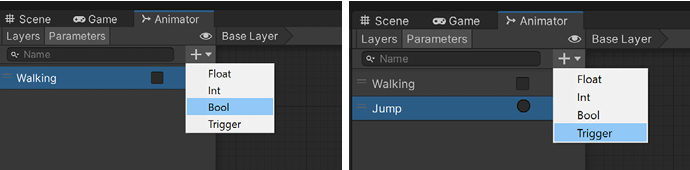

Nella finestra Animator:

* Clicca il pulsante `+` nella sezione **Parameters**.
* Scegli il tipo (Bool, Trigger, Float, Int).
* Dai un nome al parameter (es. `Walking`).

**Esempio:** Crea un Bool chiamato `Walking` e un Trigger chiamato `Jump`.

#### 3. Collegare i Parameters alle Transizioni

Una volta creati i parameters, puoi usarli come **condizioni** sulle transizioni:

* **Transizione Idle → Walk_N:** Imposta la condizione `Walking = true`. **Deseleziona "Has Exit Time"** affinché la transizione avvenga immediatamente senza attendere che Idle finisca completamente.
* **Transizione Walk_N → Idle:** Imposta la condizione `Walking = false`.
* **Transizione Idle/Walk_N → Jump:** Imposta la condizione `Jump` (Trigger) su entrambe le transizioni, poiché il giocatore potrebbe saltare da entrambi gli stati.

#### 4. Controllare i Parameters dal Codice C#

Un **script C#** è necessario per controllare i parameters del personaggio durante il gameplay.

**Acquisire il componente Animator:**
```csharp
Animator animator;

void Start()
{
    // Prendi il componente Animator sul personaggio
    animator = GetComponent<Animator>();
}
```

**Controllare i Bool parameters:**
```csharp
void Update()
{
    // Leggi l'input verticale (W o freccia su)
    float input = Input.GetAxis("Vertical");
    
    // Se il giocatore preme il tasto, imposta Walking a true
    if (input > 0)
    {
        animator.SetBool("Walking", true);
    }
    // Altrimenti, imposta Walking a false
    else
    {
        animator.SetBool("Walking", false);
    }
    
    // Continua la Walk_N finché il giocatore tiene premuto il tasto
    // Quando lo rilascia, transisce a Idle
}
```
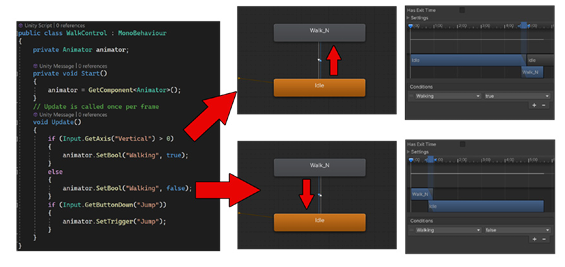

**Controllare i Trigger parameters:**
```csharp
void Update()
{
    // Se il giocatore preme Space (salto di default)
    if (Input.GetKeyDown(KeyCode.Space))
    {
        // Attiva il trigger Jump una sola volta
        animator.SetTrigger("Jump");
    }
    // Il Jump animation si ripete per ogni pressione di Space
    // Una volta completato, transisce indietro a Idle
}
```

#### 5. Alternative: Usare "Any State"

Invece di creare transizioni da ogni singolo nodo, puoi usare il nodo speciale **"Any State"**:

* Crea una transizione da **Any State** a **Jump** con la condizione `Jump`.
* Questo permette di saltare da *qualsiasi* animazione attualmente in riproduzione.

**Attenzione:** Poiché "Any State" è collegato a tutto, usa questa opzione con cautela. Potrebbe causare transizioni indesiderate.

#### 6. Ottimizzare le Animazioni: Speed e Tags

Dentro ogni **animation state node** puoi:

* **Adjust Speed:** Modifica la velocità di riproduzione (rallenta o accelera l'animazione).
* **Assegnare Tag:** Nel campo **Tag**, puoi etichettare le animazioni (es. `motion`, `idle`). Questo è utile per il codice affinché identifichi in quale "categoria" si trova il personaggio.

**Esempio:** La Walk_N ha il tag `motion`, mentre Idle non ne ha. Così il codice sa quando il personaggio si sta muovendo.

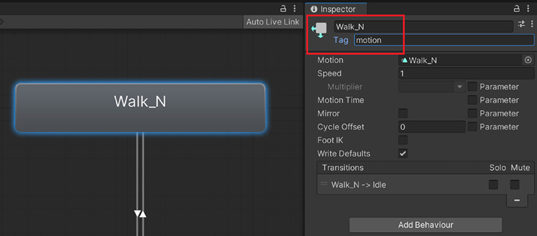
```csharp
public class WalkControl : MonoBehaviour
{
    private Animator animator;
    private AnimatorStateInfo info;

    private void Start()
    {
        animator = GetComponent<Animator>();
    }

    void Update()
    {
        info = animator.GetCurrentAnimatorStateInfo(0);
        if(info.IsTag("motion"))
        {
            transform.Translate(transform.forward * 2 * Time.deltaTime);
        }
    }
}
```


#### 7. Monitorare lo Stato dell'Animator: AnimatorStateInfo

Usa la struttura **AnimatorStateInfo** per controllare quali animazioni sono in riproduzione direttamente dal codice:
```csharp
void Update()
{
    // Ottieni informazioni dall'animator sul layer base (layer 0)
    AnimatorStateInfo stateInfo = animator.GetCurrentAnimatorStateInfo(0);
    
    // Controlla se l'animazione corrente ha il tag "motion"
    if (stateInfo.tagHash == Animator.StringToHash("motion"))
    {
        // Se sì, muovi il personaggio in avanti
        transform.Translate(Vector3.forward * moveSpeed * Time.deltaTime);
    }
}
```

Questa struttura ti passa informazioni **ogni frame** su ciò che sta accadendo nell'animator (quali clip stanno suonando, quali transizioni sono in corso, etc.), permettendoti di sincronizzare il codice con le animazioni.

#### 8. Controllo Avanzato: Monitorare Transizioni

AnimatorStateInfo non solo ti dice quale animazione è in riproduzione, ma anche se una transizione è in corso:
```csharp
AnimatorStateInfo stateInfo = animator.GetCurrentAnimatorStateInfo(0);

// Controlla se l'animator sta transendo
if (animator.IsInTransition(0))
{
    // Non fare movimento durante la transizione
}
else if (stateInfo.tagHash == Animator.StringToHash("motion"))
{
    // Continua il movimento normalmente
}
```

---

### Layers

#### 1. Cosa Sono i Layers

Puoi usare i **layers** per dividere diversi set di animazioni per un personaggio. Le diverse parti del corpo del personaggio possono usare animazioni diverse, permettendoti di combinare più animazioni in una nuova animazione unica.

L'animazione di base (ad esempio, una camminata) si trova sul **layer 0**, chiamato **Base Layer** nell'Animator.

#### 2. Avatar Mask: Selezionare Quali Parti del Corpo Animare

Un **Avatar Mask** definisce quali parti del corpo useranno l'animazione del layer base e quali useranno un'animazione diversa. Questo ti consente di combinare movimenti insieme, ad esempio usando la parte superiore del corpo da un'animazione e la parte inferiore da un'altra.

**Per creare un Avatar Mask:**

* Right-click nella Project window → Create > Avatar Mask.
* Nell'Inspector vedrai due tipi da scegliere a seconda del tipo di animazione del tuo personaggio.

#### 3. Avatar Mask: Humanoid

Se il tuo personaggio usa animazioni **Humanoid**, vedrai una **guida visiva del personaggio** nella finestra Avatar Mask.

* Clicca sulle parti del corpo nella sezione humanoid per **escluderle** (le parti diventano rosse quando escluse).
* Le parti non selezionate utilizzeranno l'animazione del base layer.
* Le parti selezionate saranno disponibili per essere controllate da altri layer.

#### 4. Avatar Mask: Generic

Se il tuo personaggio usa animazioni **Generic**, vedrai una sezione **Transform** con un albero della struttura scheletrica del personaggio.

* Devi prima **aggiungere l'Avatar** del personaggio e caricare lo scheletro da esso.
* Puoi **espandere l'albero** per mostrare tutte le ossa.
* Usa il **toggle button** per accendere o spegnere ogni osso.

**Logica:**
* **Selezionato:** L'osso sarà controllato dalla nuova animazione su questo layer.
* **Non selezionato:** L'osso sarà escluso e continuerà a usare l'animazione del base layer.

**Esempio:** Se selezioni solo le braccia, una nuova animazione guiderà le braccia (es. con le braccia sollevate per un salto), mentre il resto del corpo continua con l'animazione del base layer (es. la camminata).

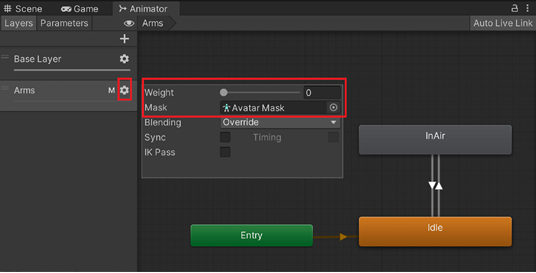

#### 5. Creare e Applicare un Nuovo Layer

Per combinare animazioni su parti diverse del corpo:

1. Nell'Animator window, aggiungi un **nuovo layer** (clicca il pulsante `+` nella sezione Layers).
2. Nomina il layer (es. "Arms").
3. Clicca sull'**icona a forma di ingranaggio (Settings)** accanto al nome del layer.
4. Nel campo **Mask**, assegna l'Avatar Mask che hai creato.
5. Crea le transizioni e aggiungi le clip di animazione per questo layer (es. un'animazione di salto con le braccia sollevate).

#### 6. Controllare il Layer Weight

Ogni layer ha un **Weight** (peso) che controlla quanto influisce sull'animazione finale:

* **Weight 0:** Il layer non ha effetto. Il base layer controlla completamente.
* **Weight 1:** Il layer ha piena potenza e sovrascrive completamente i bone del base layer.
* **Weight tra 0 e 1:** Blending fluido tra le due animazioni.

Puoi variare il weight per ottenere risultati interessanti e animazioni morbide tra i diversi movimenti.

#### 7. Controllare il Layer Weight dal Codice C#
```csharp
void Update()
{
    // Se il giocatore tiene premuto Shift
    if (Input.GetKey(KeyCode.LeftShift))
    {
        // Imposta il weight del layer "Arms" (indice 1) a 1 (massimo)
        animator.SetLayerWeight(1, 1f);
    }
    else
    {
        // Altrimenti, imposta il weight a 0 (nessun effetto)
        animator.SetLayerWeight(1, 0f);
    }
}
```

**Cosa succede:**
* Quando tieni premuto Shift mentre cammini, lo script combina le due animazioni.
* Il base layer (layer 0) controlla il corpo inferiore (camminata).
* L'Arms layer (layer 1) prende il controllo delle braccia (posizione sollevata).
* Il risultato è una nuova animazione unica: il personaggio cammina con le braccia sollevate.

#### 8. Esempio Pratico: Salto Durante la Camminata

**Setup:**
* **Base Layer (layer 0):** Contiene Idle e Walk. Avatar Mask include tutto il corpo.
* **Jump Layer (layer 1):** Contiene solo l'animazione Jump. Avatar Mask esclude il corpo inferiore, include solo le braccia e la testa.

**Gameplay:**
* Quando il giocatore cammina, il base layer riproduce Walk.
* Se il giocatore preme Space durante la camminata, il Jump layer attiva a weight 1.
* Risultato: Il corpo inferiore continua a fare la camminata, ma il busto e le braccia eseguono il salto.

---



### Blend Trees

#### 1. Cosa Sono i Blend Trees

Un **Blend Tree** è usato quando hai bisogno di **blendare (fondere) più di due animazioni insieme dinamicamente** in base ai parametri di input.

Invece di creare transizioni discrete tra stati (Idle → Walk → Run), un Blend Tree permette una **transizione fluida e continua** tra più animazioni basata su input numerico.

**Esempio:** Mentre il giocatore aumenta gradualmente la velocità (da 0 a 1), l'animazione passa fluidamente da Idle a Walk a Run, senza "scatti" tra gli stati.

#### 2. Creare un Blend Tree

Nella finestra Animator Controller:

* Right-click → Create state > From New Blend Tree.
* Un nuovo nodo Blend Tree verrà aggiunto alla state machine.
* **Double-click** sul nodo Blend Tree per entrare nella configurazione.
* Per **uscire** dal Blend Tree, clicca i pulsanti in alto a sinistra e ritorna al base layer.

#### 3. Tipi di Blend Trees

I Blend Trees possono essere:

* **1D Blend:** Basato su un **singolo input** (un solo float parameter). Esempio: velocità (0 a 1).
* **2D Blend:** Basato su **due input** (due float parameters). Esempio: movimento orizzontale (WASD) e verticale contemporaneamente.

#### 4. Configurazione 1D Blend Tree

Un **1D Blend Tree** è il tipo più semplice.

**Setup:**
1. Clicca sul nodo Blend Tree per accedervi.
2. Aggiungi le animazioni che vuoi blendare (es. Idle, Walk_N, Run).
3. Assegna a ogni animazione un **valore numerico** sulla timeline (es. Idle a 0.0, Walk_N a 0.5, Run a 1.0).

**Come funziona:**
* Quando il float parameter è 0.0, riproduce Idle.
* Quando è 0.5, blenda automaticamente tra Walk_N e le animazioni vicine.
* Quando è 1.0, riproduce Run.

**Nel codice C#:**
```csharp
void Update()
{
    // Leggi l'input (W o freccia su)
    float input = Input.GetAxis("Vertical"); // Restituisce 0.0 a 1.0
    
    // Passa il valore al float parameter del Blend Tree
    animator.SetFloat("Speed", input);
    
    // Il Blend Tree automaticamente blenda le animazioni
    // in base a questo valore
}
```

**Risultato:** Il personaggio transisce fluidamente da Idle a Walk a Run mentre il giocatore aumenta l'input.

#### 5. Configurazione 2D Blend Tree

Un **2D Blend Tree** permette di blendare animazioni basate su **due parametri**, utile per il movimento multi-direzionale (WASD).

**Setup:**
1. Crea un Blend Tree 2D.
2. Assegna **due float parameters** (es. `InputX` e `InputY`).
3. Imposta i **max values:**
   * **pos X (orizzontale):** Controlla il movimento sinistra/destra.
   * **pos Y (verticale):** Controlla il movimento avanti/indietro.
4. Aggiungi le animazioni nei punti corretti della griglia 2D (es. Walk_Forward a (0, 1), Walk_Left a (-1, 0), Walk_Backward a (0, -1)).

**Trucco:** Per la camminata all'indietro, puoi **riutilizzare Walk_N con playback speed di -1** per farla suonare in reverse, invece di creare un'animazione separata.

**Nel codice C#:**
```csharp
void Update()
{
    // Leggi input orizzontale (A/D o frecce)
    float inputX = Input.GetAxis("Horizontal");
    
    // Leggi input verticale (W/S o frecce)
    float inputY = Input.GetAxis("Vertical");
    
    // Passa entrambi i valori al Blend Tree
    animator.SetFloat("InputX", inputX);
    animator.SetFloat("InputY", inputY);
    
    // Il Blend Tree automaticamente blenda tra tutte
    // le 8 direzioni di movimento
}
```

**Risultato:** Il personaggio si muove fluidamente in tutte le direzioni (avanti, indietro, sinistra, destra, e combinazioni diagonali).

#### 6. Vantaggi dei Blend Trees

* **Transizioni fluide:** No "scatti" tra animazioni discrete.
* **Risposta naturale:** Il movimento del personaggio è fluido e realistico.
* **Meno stati:** Invece di creare 8 stati separati per il movimento (Idle, Walk_Forward, Walk_Left, etc.), ne usi uno solo (Blend Tree) con tutte le direzioni.
* **Scalabilità:** Aggiungere nuove direzioni o velocità è facile: basta aggiungere animazioni al Blend Tree.

#### 7. Esempio Pratico: Survival Runner

Nel tuo survival runner potresti usare un **1D Blend Tree** semplice:

* **Idle** (0.0): Il personaggio è fermo.
* **Jog** (0.5): Movimento leggero verso gli ostacoli.
* **Sprint** (1.0): Movimento veloce per schivare.
```csharp
void Update()
{
    float speedInput = 0f;
    
    // Se il giocatore preme W, aumenta la velocità
    if (Input.GetKey(KeyCode.W))
        speedInput = 1f;
    
    // Passa al Blend Tree
    animator.SetFloat("Speed", speedInput);
}
```

---


### Character Controller

#### 1. Cosa È un Character Controller

Un **Character Controller** è un componente Unity alternativo al **Rigidbody** per controllare un personaggio giocatore. È specificamente progettato per il controllo di **terza persona** o **prima persona** senza usare la fisica completa di Rigidbody.

**Quando usarlo:**
* Personaggi che camminano su terreni irregolari.
* Quando vuoi **controllo preciso** senza complessità fisica.
* Climb slope limit (limite di pendenza salibile).
* Step height limit (limite di altezza dei gradini).

**Quando usare Rigidbody invece:**
* Se il personaggio interagisce molto con altri oggetti fisici.
* Se vuoi vere collisioni e rimbalzi.

#### 2. Setup Base: Il Blend Tree Corretto

Crea un **1D Blend Tree** con tre animazioni:

| Animazione | Threshold | Azione |
| --- | --- | --- |
| Walk/Run Backward | -1 | S (indietro) |
| Idle | 0 | Fermo |
| Walk/Run Forward | 1 | W (avanti) |

**Importante:** Deseleziona il checkbox **Automate Thresholds** affinché i valori rimangano -1, 0, 1.

**Comportamento del Blend Tree:**
* Premi W → Vertical = 1 → Riproduce Walk Forward.
* Premi S → Vertical = -1 → Riproduce Walk Backward.
* Niente → Vertical = 0 → Riproduce Idle.
* Valori intermedi (es. 0.5) → Blenda fluidamente tra Idle e Walk Forward.

#### 3. Creare il Parameter

Crea un **Float parameter** chiamato `Vertical`:

* Nella finestra Animator, sezione Parameters → clicca `+` → scegli **Float**.
* Nomina il parameter `Vertical`.
* Nel Blend Tree, assegna `Vertical` come parametro di controllo per il 1D Blend.

#### 4. Aggiungere il Character Controller al Personaggio

Nel GameObject del personaggio:

* Add Component → **Character Controller**.
* Non devi più un Rigidbody (il Character Controller lo sostituisce).

#### 5. Regolare Step Offset (Altezza dei Gradini)

Il **Step Offset** permette al personaggio di salire piccoli gradini automaticamente:

* **Valore basso (0.1-0.2):** Salisce solo gradini molto bassi.
* **Valore alto (0.5+):** Salisce gradini alti (attenzione: potrebbe far saltare piccoli ostacoli come muri bassi).

**Consiglio:** Inizia con 0.3 e ajusta in base al tuo gameplay.

#### 6. Regolare Slope Limit (Limite di Pendenza)

Il **Slope Limit** è l'angolo massimo che il personaggio può salire:

* **45°:** Default, terreni moderatamente ripidi.
* **60°+:** Terreni molto ripidi.
* **90°+:** Il personaggio può salire pareti verticali (non realistico, ma utile in certi giochi).

#### 7. Regolare Center Y e Height

Questi valori posizionano il **collider del Character Controller** attorno al personaggio:

* **Center Y:** Alza/abbassa il collider verticalmente. Imposta a **1** per centrare il collider sul corpo del personaggio.
* **Height:** L'altezza totale del collider. Imposta a **2** per un personaggio di altezza umana. Aumenta per personaggi più alti.

**Esempio:**
* Personaggio umano: Center Y = 1, Height = 2.
* Personaggio alto/gigante: Center Y = 1.5, Height = 3.

#### 8. Regolare Radius (Larghezza)

Il **Radius** è lo spessore del collider (come una capsula verticale):

* **Personaggi larghi:** Radius = 1 o superiore.
* **Personaggi magri/sottili:** Radius = 0.3 o inferiore.

### Aggiunta di una Camera: Cinemachine

Per una **camera dinamica** che segue il personaggio:

1. Installa **Cinemachine** via Window > Package Manager (Unity Registry).
2. Crea una Virtual Camera: GameObject > Cinemachine > Virtual Camera.
3. Nella Virtual Camera:
   * Assegna il personaggio nel campo **Follow**.
   * Assegna il personaggio nel campo **Look At**.
   * Ajusta i valori di offset per posizionare la camera (distanza, altezza, rotazione).

**Risultato:** Una camera che segue il personaggio fluidamente.

### Differenza tra Rigidbody e Character Controller

| Aspetto | Rigidbody | Character Controller |
| --- | --- | --- |
| **Fisica** | Completa (gravità, collisioni, forze) | Semplificata |
| **Controllo** | Meno preciso | Preciso e prevedibile |
| **Performance** | Più pesante | Più leggero |
| **Use Case** | Simulazioni, giochi complessi | Movimento personaggio semplice |
| **Step/Slope** | Devi programmarlo manualmente | Già integrato |

### Quando Usare Cosa nel Tuo Survival Runner

**Character Controller se:**
* Il personaggio corre sempre in avanti.
* Non interagisce fisicamente con molti oggetti.
* Vuoi movimento **semplice e responsivo**.

**Rigidbody se:**
* Il personaggio può essere colpito e spinto da nemici.
* Ci sono molti oggetti che lo colpiscono.
* Vuoi **vere collisioni fisiche**.

---


# Animation in Unity: Dalla Teoria alla Pratica

## Il Problema Fondamentale: FBX vs Clip Duplicato

Quando importi un personaggio da Blender o Maya in Unity, le animazioni arrivano **embedded nell'FBX**, il che significa **read-only**. È come avere un libro in una biblioteca: puoi leggerlo, ma non scriverci sopra.

La soluzione? **Duplicare l'animazione** (Ctrl + D) per creare una copia editabile. Una volta duplicata, lavori su quella copia, mentre l'originale nell'FBX rimane intatto come riferimento.

**Attenzione critica:** Il tipo di animazione (Generic, Humanoid, ecc.) si decide sull'FBX originale. Se duplichi il clip, non puoi più cambiargli il tipo: devi tornare all'originale.

## Workflow: Record vs Preview

Ecco la distinzione operativa:

| Modalità | Cosa Fa | Quando Usarla |
| --- | --- | --- |
| **Preview** | Ti permette di posizionare keyframe **manualmente** su proprietà specifiche | Quando sai esattamente cosa vuoi animare |
| **Record** | Cattura **automaticamente ogni modifica** che fai | Quando modifichi l'oggetto e vuoi salvare tutti i cambiamenti |

**Analogia:** Preview è come scattare foto in posti specifici. Record è come una videocamera sempre accesa che cattura tutto.

Attiva Record (pulsante rosso in alto), poi modifica il personaggio nella Scene view: ogni movimento si salva automaticamente come keyframe.

## Creare Animazioni da Zero: Forward Kinematics (FK)

Se vuoi animare un personaggio **partendo da una clip vuota**:

1. **Crea una nuova clip:** Animation window → dropdown → Create New Clip
2. **Premi Record** per iniziare
3. **Seleziona un osso** (bone) nella Hierarchy
4. **Aggiungi keyframe iniziale:** Right-click sulla Rotation → Add Key

Ora hai il primo fotogramma. Il concetto cruciale: **i keyframe agiscono come "fotografie" del tempo**.

### Il Concetto di Keyframe Statico

Se vuoi che una gamba **rimanga ferma per 2 secondi**:
- Frame 0: Aggiungi keyframe (gamba in posizione A)
- Frame 60 (2 secondi a 30fps): Aggiungi un altro keyframe (stessa posizione A)
- Risultato: Nessun movimento tra i due keyframe

Poi dal frame 60 in poi, puoi iniziare a ruotare la gamba. Questo è essenziale per animazioni che hanno fasi statiche seguite da movimento.

## Keyframing Avanzato: Assi e Filtri

Quando animi un osso, puoi controllare separatamente **X, Y, Z** per:
- **Posizione (Transform)**
- **Rotazione (Rotation)**
- **Scala (Scale)**

Il trucco efficiente: **Filter by selection**. Invece di keyframmare ogni osso manualmente:
1. Seleziona solo gli ossi che ti interessano nella lista
2. Clicca "Filter by selection"
3. Premi "Add keyframe": aggiunge keyframe **solo agli ossi filtrati**

Questo ti risparmia il click-destro ripetuto su ogni osso.

## Curve e Easing: Il Movimento Fluido

Ecco dove l'animazione diventa cinematica: le **curve definiscono come l'animazione transisce tra i keyframe**.

**Default (Clamped Auto):**
```
Slow start → Accelerazione → Decelerazione verso fine
```
Questo crea movimento naturale, non robotico.

**Linear (assenza di easing):**
```
Velocità costante tra keyframe
```
Utile per transizioni meccaniche o precisione assoluta.

**Come cambiare:** Right-click sul keyframe → scegli il tipo di tangente → modifica la curva con i bezier handle.

**Domanda di riflessione:** Se animassi una porta che si apre, quale easing useresti—Linear o Clamped Auto? *Perché la scelta cambia l'impressione del movimento?*

## Property Animation: Oltre gli Ossi

Una feature sottovalutata: puoi animare **qualsiasi proprietà**, non solo gli ossi:
- Intensità di una luce
- Materiali (colore, texture offset)
- Campo visivo della camera
- Attivazione/disattivazione di oggetti

Tutto finisce nella stessa timeline, creando animazioni complesse e sincronizzate.

## Interfaccia: Dopesheet vs Curves

| Vista | Cosa Vedi | Caso d'Uso |
| --- | --- | --- |
| **Dopesheet** | Griglia di keyframe come punti temporali | Visione d'insieme, timing generale |
| **Curves** | Curve fluide tra keyframe | Fine-tuning del movimento, easing |

Passa tra le due con i pulsanti in basso. Il Dopesheet è veloce per posizionare keyframe; le Curves sono per il polish finale.

## Shortcut Essenziali (Windows)

```
F          → Frame sui keyframe selezionati
A          → Frame su tutte le curve
Alt+Scroll → Zoom in/out
Alt+Shift+Drag → Zoom verticale (per dettagli)
Alt+Ctrl+Drag  → Zoom orizzontale (timeline)
```

Le proprietà animate compaiono **rosso** in Inspector durante la modifica, **blu** quando esci da Record mode. È il tuo indicatore visivo: "questa proprietà è stata toccata dall'animazione".

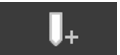
---

---

# Advanced Animation Features: Root Motion, Events Read-Only, e Blend Shapes

## Events su Clip Read-Only (FBX Embedded)

Ricordi il problema iniziale? Le animazioni nell'FBX sono **read-only** e non puoi editarle nell'Animation window.

**Ma puoi comunque aggiungere Animation Events** senza duplicare la clip.

### Come Funziona

1. **Seleziona l'FBX file** nella Project window
2. **Guarda l'Inspector** → sezione "Animations"
3. **Clicca sulla clip** (es. "Walk")
4. **Scorri fino a "Events"** → clicca "Add Event"
5. **Scrivi manualmente il nome della funzione** (non puoi selezionarla da dropdown)

```
Events section:
┌─────────────────────┐
│ Walk                │
│ ├─ Event at 0:30    │
│ │  Function: LeftFootImpact
│ │  Parameters: (nessuno)
│ │
│ └─ Event at 0:60    │
│    Function: RightFootImpact
│    Parameters: (int damage = 5)
└─────────────────────┘
```

**Critico:** Devi **digitare il nome manualmente**. Se sbagli il nome, l'evento non trova la funzione.

**Vantaggi:**
- ✅ Non duplichi la clip (risparmi memoria)
- ✅ Gli eventi rimangono nel file FBX originale

**Svantaggio:**
- ❌ Senza preview visivo del timing

---

## Root Motion: Il Movimento Realistico

Ecco il problema che Root Motion risolve:

### Il Problema: In-Place vs World Space

**Clip in-place** (il classico):
```
Frame 0:   Piede sinistra = posizione A
Frame 30:  Piede destra = posizione B (avanti)
Frame 60:  Torna a Frame 0 → Piede torna a posizione A
           MA il personaggio è ancora avanti!
           → Piede "scivola all'indietro" (foot sliding)
```

Paradosso: L'animazione dice "il piede avanza", ma il personaggio salta indietro quando riparte il loop.

### La Soluzione: Root Motion

**Root Motion ABILITATO:**
```
Frame 0:   Personaggio alla posizione 0
Frame 30:  Personaggio avanza a posizione +1
Frame 60:  Torna al frame 0, MA continua da posizione +1
           (non salta indietro)
```

Il "root" (la radice dello scheletro) contiene i **keyframe di movimento**. Unity legge questi keyframe e muove il personaggio automaticamente, **senza foot sliding**.

### Setup

1. **Seleziona il GameObject** con l'Animator
2. **Guarda il componente Animator** nell'Inspector
3. **Abilita "Apply Root Motion"** ✓

**Cosa succede:**
- ✅ Il movimento dell'animazione (baked nei keyframe) controlla il personaggio
- ✅ Il piede rimane a contatto col suolo durante la walk
- ✅ Nessun foot sliding

**Quando usare Root Motion:**
- Walk/Run animations con movimento orizzontale
- Attacchi/combo (boxer con pugni in sequenza)
- Animazioni complesse dove i piedi si muovono velocemente

**Quando NON usare:**
- Idle (personaggio fermo)
- Jump (se vuoi controllo fisico → usa Rigidbody.AddForce)

### Root Motion vs Script Movement

| Approccio | Vantaggi | Svantaggi |
| --- | --- | --- |
| **Root Motion** | Timing perfetto piede-movimento | Meno controllo da script |
| **Script (Input)** | Controllo totale | Risk di foot sliding |
| **Ibrido** | Movimento base root, input aggiustamenti | Più complesso |

---

## Jump con Root Motion: Y Position Bake

Per i salti, c'è un **workaround critico**:

Se un'animazione di salto ha il **movimento verticale (Y) baked nei keyframe**, e abiliti Root Motion, il personaggio salterà solo finché l'animazione lo dice—poi cadrà di colpo.

**Soluzione:** Baka SOLO la **posizione Y** nell'animazione di salto, e lascia che **Rigidbody.AddForce** gestisca la gravità:

```csharp
public void Jump()
{
    // Y position è baked nell'animazione
    // Gravity è gestita da Rigidbody
    _rigidbody.AddForce(Vector3.up * jumpForce, ForceMode.Impulse);
}
```

**Nel file FBX:** L'animazione di salto contiene i keyframe di Y per il movimento ascendente naturale.

---

## Blend Shapes: Deformazioni Mesh

Un **Blend Shape** (detto "morph target" in altri software) è una **variazione della forma del mesh** che puoi "mescolare" con l'originale.

### Concetto Fondamentale

Immagina un viso:
- **Forma base:** Faccia neutra
- **Blend Shape 1:** Faccia con occhio sinistro chiuso (0-1 weight)
- **Blend Shape 2:** Bocca aperta (0-1 weight)

**Mischiando:** Occhio sinistro chiuso al 50% + bocca aperta al 100% = espressione unica.

### Uso Pratico nel Tuo Progetto

**Espressioni facciali:**
```
Inspector:
┌─────────────────────┐
│ Blend Shapes        │
├─────────────────────┤
│ Blink:         0.8  │ ← Occhio quasi chiuso
│ Smile:         0.5  │ ← Sorriso parziale
│ Surprise:      0.0  │ ← Niente
└─────────────────────┘
```

**Clothing (secondary motion):**
```
Maglietta del personaggio:
│ Bounce:        0.6  │ ← La maglietta rimbalza
│ Wave:          0.3  │ ← Leggera ondulazione
```

### Come Animare i Blend Shapes

Esattamente come animazioni normali:
1. **Apri l'Animation window**
2. **Seleziona la clip** (es. "Talking")
3. **Record ON**
4. **Espandi il mesh nel hierarchy**
5. **Seleziona i Blend Shapes sliders** e modifica i valori
6. I keyframe si creano automaticamente

---



# Humanoid Animation Type: Il Sistema Intelligente

## Il Concetto Fondamentale

**Humanoid** è un animation type che **non dipende dai nomi dei bone**.

Pensa a due estremi:

```
Generic: "Trova l'osso chiamato 'LeftArm' e muovilo"
         ↓
         Se il modello ha l'osso chiamato 'Left_Shoulder', 
         non funziona—deve essere esattamente 'LeftArm'

Humanoid: "Trova il tuo osso del braccio sinistro (qualsiasi nome sia)"
          ↓
          Lavora su quasi tutti i personaggi umani, indipendentemente 
          da come sono stati nominati in Blender/Maya
```

**Analogia:** Generic è una chiave che funziona solo su una serratura specifica. Humanoid è una chiave master che si adatta a molte serrature.

## Setup: La Posa Cruciale (T o A Pose)

Il primo passo è **critico**: il tuo modello deve essere in **T pose** o **A pose**.

```
T Pose:           A Pose:
   |                 |
  /|\              / \
 / | \            /   \
   |              |
  / \             |
 /   \           / \
      
(braccia estese) (braccia leggermente aperte)
```

**Perché?** Unity cerca i bone a **posizioni standard**. Se il personaggio è in una posa animata (in mezzo a un'azione), gli ossi sono in posti strani e Unity non sa dove metterli nei "slot di riferimento".

### Setup Pratico

1. **Seleziona il tuo character.fbx** in Project
2. **Inspector → Rig section**
3. **Animation Type dropdown** → seleziona **"Humanoid"**
4. **Avatar Definition** → **"Create From This Model"**
5. **Clicca "Apply"**

Se il modello è in T pose e ben fatto, riceverai il messaggio: ✅ **"Humanoid conversion successful"**

## Cosa Succede Automaticamente: Avatar Creation

Quando Unity converte a Humanoid, **crea un Avatar**—una mappa di riferimento che dice:

```
Bone Reference Points (standard umani):
├── Head → (trova l'osso della testa)
├── Spine → (trova la spina dorsale)
├── LeftUpperArm → (trova il braccio sinistro)
├── LeftHand → (trova la mano sinistra)
├── LeftFoot → (trova il piede sinistro)
├── RightFoot → (trova il piede destro)
└── ... e altri
```

**Non importa se nel tuo modello l'osso della testa si chiama "Head", "Capo", "Skull"—Unity lo trova comunque basandosi sulla posizione nello scheletro.**

### Se la Conversione Fallisce

Se il messaggio dice ❌ **"Humanoid conversion failed"**, Unity non ha trovato tutti i bone. Opzioni:

1. **Configure manualmente:** Clicca il pulsante "Configure" e assegna manualmente ogni osso agli slot di riferimento
2. **Controlla il modello:** Potrebbe avere una struttura scheletrica troppo strana o incompleta

## Il Vantaggio Killer: Avatar Reusability

Qui è dove Humanoid diventa geniale.

### Scenario: Mixamo (o altre asset store)

Scarichi animazioni da Mixamo (walk, run, jump) ma il **modello di Mixamo è diverso dal tuo personaggio**. Con Generic, le animazioni non funzionerebbero—i nomi dei bone sono diversi.

**Con Humanoid:**

1. **Importi il modello di Mixamo in T pose**
2. **Crei l'Avatar da quel modello** (Convert to Humanoid)
3. **Importi le clip di animazione di Mixamo**
4. **Nel Avatar Definition della clip:** scegli **"Copy From Other Avatar"** → seleziona l'Avatar del modello di Mixamo
5. **Risultato:** Quelle clip di animazione ora funzionano su **QUALSIASI personaggio humanoid**—il tuo, un altro modello, chiunque

```
Avatar_Mixamo (T pose model)
          ↓
    (crea mapping)
          ↓
    Walk.anim
    Run.anim
    Jump.anim
          ↓
(funzionano su qualsiasi character humanoid)
```

## Loop Matching: Il Codice Colore del Movimento

Nel pannello di Humanoid clip settings vedi un **color code**:

```
Transform:           🟢 (verde)
Rotation:            🟢 (verde)
Root Motion Position (XZ): 🔴 (rosso)
Root Motion Position (Y):  🟢 (verde)
```

### Cosa Significa

| Colore | Significato | Cosa Fare |
| --- | --- | --- |
| 🟢 **Verde** | Primo e ultimo keyframe **combaciano** | Loop senza "pop" (salto visibile) |
| 🔴 **Rosso** | Primo e ultimo keyframe **non combaciano** | C'è movimento baked (root motion) |

### Pratica

**Clip di Walk (in-place):**
```
🟢 Transform → Non si muove orizzontalmente, puoi muoverlo con codice
🟢 Rotation → Guarda nella stessa direzione all'inizio e fine
🟢 Position Y → Non salta su/giù
```

**Clip di Walk (con root motion):**
```
🔴 Position (XZ) → Il primo e ultimo frame sono in posti diversi
    (significa: muoversi in avanti è baked)
```

---

## Root Motion + Rigidbody: Il Conflitto

Problema delicato: se il tuo personaggio ha sia **Rigidbody** che **Root Motion abilitato**, si crea un conflitto.

**Soluzione:** Usa **"Bake Into Pose"**

```csharp
Bake Into Pose:
├── Root Transform Rotation    → ☑ (baka la rotazione nella pose)
├── Root Transform Position (Y) → ☑ (baka il salto nella pose)
└── Root Transform Position (XZ)→ ☐ (lascia il movimento orizzontale
                                      controllato da code/root motion)
```

**Cosa significa "bake"?**
Significa: trasferisci il movimento dall'animazione **direttamente nella posizione della mesh**, non nel root bone. Così Rigidbody può gestire la fisica senza conflitti.

**Pratica:**
- Personaggio che **salta**: Bake Position (Y) perché la gravità gestisce la caduta
- Personaggio che **cammina in avanti**: Non bake Position (XZ) perché il movimento è sincronizzato col passo

## Generic vs Humanoid: Quando Scegliere

| Aspetto | Generic | Humanoid |
| --- | --- | --- |
| **Dipende dai nomi** | Sì (rigoroso) | No (posizione nello scheletro) |
| **Riusabile su modelli diversi** | No | Sì |
| **Complessità** | Bassa | Media (ma automatica) |
| **Twist bones, leaf bones** | No | Sì |
| **Perfetto per** | Oggetti, creature custom | Personaggi umani/biped |

---



**"La Cinematica Inversa (Inverse Kinematics o IK) è una tecnica utilizzata nell'animazione e nella robotica per determinare le posizioni e le rotazioni delle articolazioni di una struttura scheletrica basandosi sulla posizione desiderata dell'estremità finale (chiamata end effector), come la mano o il piede di un personaggio. Questo permette di ottenere movimenti più naturali e realistici. Immagina di controllare la mano di un personaggio in un gioco: con la cinematica inversa (IK), invece di dover muovere manualmente ogni singola articolazione del braccio per posizionare la mano dove vuoi, devi semplicemente specificare il punto che la mano deve raggiungere. Il sistema IK calcolerà quindi automaticamente come regolare le articolazioni di spalla, gomito e polso per arrivare a quella posizione, risultando in un movimento più fluido e naturale."**

- Senza IK (Animazione Classica - Forward Kinematics): È come una Stop Motion. Devi ruotare la spalla, poi il gomito, poi il polso per far arrivare la mano su una maniglia. Se sposti la spalla, la mano si sposta e manca la maniglia.

- Con IK (Inverse Kinematics): È come avere un Burattino "Magico". Tu prendi la mano del burattino e la inchiodi sulla maniglia. Il burattino calcola da solo ("automaticamente") come piegare il gomito e la spalla per non spezzarsi il braccio

# Animation Rigging: IK (Inverse Kinematics) per Controllo Dinamico

## Il Problema Che Risolve

Immagina il tuo personaggio in Survival Runner che incontra un terreno irregolare—una roccia, un'inclinazione, una sedia.

```
Animazione baked:
Il piede è a Y = 2.0 (l'altezza quando è stato animato)
Ma il terreno è a Y = 1.5
→ Il piede passa ATTRAVERSO il terreno (foot sliding/clipping)
```

Con l'animazione baked, il movimento è **fisso**. Non puoi adattarlo al mondo reale.

**Animation Rigging risolve questo:** ti permette di **adattare in tempo reale** come il personaggio si posiziona nello spazio.

## IK (Inverse Kinematics): Il Concetto

### Forward Kinematics (FK)
```
"Ruota la spalla di 45°, il gomito di 30°, il polso di 15°"
    ↓
Calcola manualmente ogni articolazione
    ↓
La mano finisce a posizione X, Y, Z (dipende dai calcoli precedenti)
```

### Inverse Kinematics (IK) - Il Contrario
```
"Voglio che la mano raggiunga la posizione X, Y, Z"
    ↓
IK calcola automaticamente: spalla 45°, gomito 30°, polso 15°
    ↓
La mano raggiunge esattamente dove vuoi
```

**Analogia:** FK è come dire a un amico "fai 3 passi avanti, gira a destra, fai 2 passi". IK è come dire "vai al cancello" e lui capisce come arrivarci.

## Setup: Installare Animation Rigging

1. **Window > Package Manager**
2. **In alto a sinistra:** seleziona **"Unity Registry"** dal dropdown
3. **Cerca:** "Animation Rigging"
4. **Clicca "Install"**
5. **Opzionale ma consigliato:** installa anche il **Samples package** (contiene scene di esempio)

## Aggiungere un IK Rig al Personaggio

### Step 1: Rig Setup Base

```
Seleziona il GameObject del personaggio (root)
    ↓
Animation Rigging > Rig Setup
    ↓
Aggiunge automaticamente:
├── Animator component
└── Rig Builder component
    └── Crea un GameObject figlio "Rig 1"
```

**Opzionale:** Aggiungi **Bone Renderer Setup** per visualizzare lo scheletro (utile per debuggare, ma non necessario).


## Two Bone IK Constraint: Braccia e Gambe

Questo è il constraint più usato. Controlla **due ossa collegate** (gomito + spalla, oppure caviglia + ginocchio).

### Setup Pratico: Braccio

1. **Seleziona "Rig 1"** (il GameObject che contiene i constraints)
2. **Add Component > Animation Rigging > Two Bone IK Constraint**
3. **Nel componente:**
   - **Tip:** Trascinaci il GameObject della mano
   - Clicca i tre puntini → **"Auto Setup from Tip Transform"**

```
Auto Setup fa automaticamente:
├── Trova la spalla e il gomito collegati alla mano
├── Crea un Target (il punto dove vuoi che vada la mano)
├── Crea un Hint (controlla la rotazione del gomito)
└── Aggiunge effectors per visualizzare
```

### Come Funziona

```
Target (la mano vuole andare qui)
    ↓ IK calcola
Spalla + Gomito ruotano automaticamente
    ↓
La mano raggiunge il target
```

Ora in Play mode, **seleziona il Target e muovilo**—il braccio lo segue automaticamente.

## Weight: Blendare Animazione + IK

**Problema:** Se abiliti IK al 100%, l'animazione **sparisce**—il braccio si muove solo in base al target, non all'animazione.

**Soluzione:** Usa il **Weight slider**

```
Weight = 1.0  → IK ha pieno controllo, animazione ignorata
Weight = 0.5  → Metà animazione, metà IK (blendato)
Weight = 0.0  → Animazione completa, IK ignorato
```

**Pratica nel tuo Survival Runner:** Se vuoi che il personaggio tenga qualcosa mentre cammina, setta Weight = 0.8—l'IK controlla di più (mano mantiene posizione), ma l'animazione di walk continua.

## Multi-Aim Constraint: Sguardo Dinamico

Fa sì che la testa del personaggio **guardi verso un target**, come un nemico che si avvicina.

### Setup

1. **Add Component > Multi-Aim Constraint**
2. **Constrained Object:** Seleziona l'osso della testa
3. **Aim Axis:** Imposta la direzione di sguardo (dipende da come è orientato il modello)
4. **Up Axis:** Controlla la rotazione della testa (up/down)
5. **World Up Type:** Scegli **"Scene Up"** per risultati più prevedibili

```
Ora crei un target (GameObject vuoto) e lo muovi intorno
    ↓
La testa guarda sempre il target
    ↓
Perfetto per nemici, dialoghi, reazioni
```

**Nel tuo Survival Runner:** Quando un nemico si avvicina, il personaggio lo guarda automaticamente.

## Multiple Rigs: Controllo Indipendente

Puoi avere **più di un Rig** sulla stessa persona.

```
Rig 1 (braccia):
├── Two Bone IK Left Arm
└── Two Bone IK Right Arm

Rig 2 (testa):
└── Multi-Aim Constraint (guarda il nemico)
```

**Perché?** Ogni Rig è **indipendente**. Così le braccia seguono il target, ma la testa guarda il nemico, **senza conflitti**.

## Foot IK: Il Caso d'Uso Più Comune

Il tuo Survival Runner probabilmente avrà terreno irregolare. Foot IK **mantiene i piedi a contatto col suolo**.

### Problema Classico

```
Animazione Walk: il piede è a Y = 0
Ma il personaggio è su una collina a Y = 0.5
→ Il piede flotta sopra il terreno
```

### Soluzione: Hips + Two Bone IK (Piedi)

1. **Crea un Hip Control** (Two Bone IK sul bacino)
   - Questo muove il corpo su/giù

2. **Due Two Bone IK Constraints** (uno per ogni piede)
   - Questi mantengono i piedi a terra

```
Hierarchy di calcolo (IMPORTANTE):
┌─ Rig Builder
│  ├─ Hip Control (calcolato PRIMO)
│  │  └─ Muove il corpo
│  ├─ Left Foot IK (calcolato SECONDO)
│  │  └─ Mantiene piede sinistro a terra
│  └─ Right Foot IK (calcolato TERZO)
│     └─ Mantiene piede destro a terra
```

**Critico:** L'ordine importa! IK si calcola dall'alto verso il basso della gerarchia. Se metti i piedi prima delle anche, il movimento sarà sbagliato.

**Risultato:** Quando il terreno sale, le anche salgono, i piedi rimangono a contatto—zero clipping.

## Override Transform: Animazione + IK Blend

Se vuoi che l'animazione **continui** ma con **leggeri aggiustamenti via IK**:

### Setup

1. **Crea GameObject vuoti** come figli di ogni osso che vuoi controllare (spina, spalla, collo)
2. **Add Component > Override Transform** a questi targets
3. **Constrained Object:** L'osso da modificare
4. **Override Source:** Il target GameObject

```
Risultato:
Animazione: controlla il 90% del movimento
Override Transform: aggiusta il 10% restante (rotazione spina, inclinazione collo)
    ↓
Movimento naturale + adattabilità
```

**Nel tuo Survival Runner:** La walk animation continua normalmente, ma l'Override Transform aggiusta leggermente la spina per seguire il terreno irregolare.

## Multi-Referential Constraint: Controllo Preciso dei Piedi

Per posizionamento **ultra-preciso** dei piedi (es. seduto su una sedia, in piedi su una roccia).

Crei **tre target points** per il piede:
- Tallone (heel)
- Pianta (ball)
- Punta (toe)

Poi dici: "Ruota il piede dal pivot del tallone", "Ruota dal pivot della pianta", ecc.

## Benefici Pratici di Animation Rigging

| Vantaggio | Impatto sul Tuo Progetto |
| --- | --- |
| **Terreno irregolare** | Foot IK adatta il corpo al terreno in tempo reale |
| **Nemici dinamici** | Multi-Aim fa guardare il personaggio verso i nemici |
| **Carrare oggetti** | Two Bone IK mantiene le mani sul box mentre cammina |
| **Performance** | IK è ottimizzato, funziona bene anche con molti constraints |
| **Modularità** | Ogni parte può avere il suo constraint—zero conflitti |
| **Iterazione rapida** | Modifichi i target in Play mode, vedi subito i risultati |

---



# Advanced Simulation: Rigidbody Physics

## Il Concetto Fondamentale

**Rigidbody Physics** è il sistema di Unity che simula **gravità, collisioni, attrito, rimbalzi**—tutto quello che succede nel mondo reale quando gli oggetti si muovono e si scontrano.

```
Senza Rigidbody:
GameObject cade attraverso il pavimento → Niente fisica

Con Rigidbody:
GameObject cade, tocca il pavimento → Si ferma (collisione realistica)
```
## Setup Base: Rigidbody + Collider

Per aggiungere fisica a un oggetto:

1. **Add Component > Rigidbody**
2. **Add Component > Mesh Collider** (o il tipo di collider che serve)

```
Hierarchy:
GameObject
├── Mesh Renderer (per visualizzarlo)
├── Rigidbody (per la fisica)
└── Mesh Collider (per le collisioni)
```

**Analogia:** 
- **Rigidbody** = "Questo oggetto ha peso e reazioni fisiche"
- **Collider** = "Questo oggetto ha una forma solida nello spazio"

---

## Proprietà Critiche del Rigidbody

| Proprietà | Cosa Fa | Consiglio |
| --- | --- | --- |
| **Mass** | Peso dell'oggetto | Valori realistici: umano ≈ 80 |
| **Drag** | Resistenza dell'aria mentre cade | 0 = niente resistenza, 1+ = lento |
| **Is Kinematic** | ☐ = usa gravità, ☑ = non usa gravità | Lascia unchecked per gravità normale |
| **Freeze Position (Y)** | Congela movimento verticale | Utile per non far cadere il personaggio |
| **Freeze Rotation (X,Y,Z)** | Congela rotazione | Utile per armi, oggetti che non devono ruotare |

### IsKinematic: La Proprietà Confusa

```
IsKinematic = FALSE (☐):
    L'oggetto è soggetto a gravità
    Cade naturalmente
    Collisiona fisicamente

IsKinematic = TRUE (☑):
    L'oggetto NON cade
    NON usa gravità
    Ma può ancora rilevare collisioni (trigger)
    Utile per: piattaforme, oggetti controllati da codice
```

## Collider: Trigger vs Collider Fisico

### Collider Fisico (Default)

```
Is Trigger: ☐ (unchecked)
    Comportamento: solido
    L'oggetto BLOCCA il passaggio
    Non puoi camminare attraverso
```

### Trigger Collider

```
Is Trigger: ☑ (checked)
    Comportamento: fantasma
    L'oggetto è TRASPARENTE
    Puoi camminare attraverso
    MA rileva quando qualcosa interseca (OnTriggerEnter)
```

**Pratica nel tuo Survival Runner:**
```
Ostacoli (rocce, muri):
├── Is Trigger = FALSE (blocca il personaggio)

Aree di danno (fuoco, acqua velenosa):
├── Is Trigger = TRUE (il personaggio attraversa, ma prende danno)
```

---

## Physic Material: Simulare i Materiali Reali

Una **Physic Material** definisce come un oggetto si comporta fisicamente—attrito, rimbalzo, ecc.

### Come Creare

1. **Project window > Create > Physic Material**
2. **Nomina:** `Wood`, `Metal`, `Bouncy`, ecc.
3. **Configura le proprietà** (tabella sotto)
4. **Assegna al Collider:** Seleziona il collider → assegna la material nel campo "Material"

### Proprietà Principali

```
┌─────────────────────────────────────┐
│ Physic Material: Wood               │
├─────────────────────────────────────┤
│ Dynamic Friction:    0.45           │ ← Attrito mentre scivola
│ Static Friction:     0.45           │ ← Attrito mentre è fermo
│ Bounciness:          0              │ ← 0 = non rimbalza, 1 = rimbalza perfetto
│ Friction Combine:    Average        │
│ Bounce Combine:      Average        │
└─────────────────────────────────────┘
```

### Preset Comuni

| Materiale | Friction | Bounciness | Uso |
| --- | --- | --- | --- |
| **Bouncy** | 0.3 | 1.0 | Palle rimbalzanti |
| **Ice** | 0.1 | 0.0 | Superfici scivolose |
| **Metal** | 0.15 | 0.0 | Pavimenti duri |
| **Rubber** | 1.0 | 0.5 | Gomma elastica |
| **Wood** | 0.45 | 0.0 | Pavimenti normali |
| **Zero Friction** | 0.0 | 0.0 | Superficie perfettamente liscia |

**Nel tuo Survival Runner:** 
- Terreno normale = **Wood** (0.45 friction)
- Ghiaccio/fango = **Ice** (0.1 friction, scivoloso)

---

## Gravità Globale: Project Settings

La gravità di default è **-9.81** (realistica, come sulla Terra).

### Come Cambiare

**Edit > Project Settings > Physics**

```
┌──────────────────────┐
│ Gravity: -9.81       │ ← Puoi cambiarla qui
└──────────────────────┘
```

**Usi:**
- `-9.81` = Terra normale
- `-4.9` = Luna (metà gravità)
- `0` = Spazio (niente gravità)
- Aumentare per gravità più forte (mondo alieno)

---

## Layer Collision Matrix: Quali Oggetti Collidono

Accanto alla gravità in **Project Settings > Physics**, c'è la **layer collision matrix**.

```
Serve per dire: 
"Il layer Player collide con Ground, ma NON collide con Trigger"
"Il layer Enemy collide con Ground e Player, ma NON collide con altri Enemy"
```

### Pratica

1. **Crea layer:** Inspector > Layer dropdown > "Add Layer"
2. **Assegna layer a GameObject:** Inspector > Layer dropdown > seleziona il layer
3. **Configura collisioni:** Project Settings > Physics > Collision Matrix

```
        Ground  Player  Enemy  Trigger
Ground    ☑       ☑       ☑       ☐
Player    ☑       ☑       ☑       ☐
Enemy     ☑       ☑       ☐       ☐
Trigger   ☐       ☐       ☐       ☐
```

**Nel tuo Survival Runner:**
```
- Player collide con Ground e Obstacle
- Enemy collide con Ground e Player
- Trigger (danno, pickup) non collide fisicamente con nulla
```

---

## Aggiungere Forza a un Oggetto: AddForce

Quando vuoi **applicare una forza** a un Rigidbody (es. saltare, lanciare):

```csharp
using UnityEngine;

public class ThrowKnife : MonoBehaviour
{
    private Rigidbody _rigidbody;
    public float throwForce = 20f;

    private void Start()
    {
        _rigidbody = GetComponent<Rigidbody>();
    }

    private void Update()
    {
        // Quando clicchi il mouse, lancia il coltello
        if (Input.GetMouseButtonDown(0))
        {
            // Applica forza in avanti (Z positivo)
            _rigidbody.AddForce(Vector3.forward * throwForce, ForceMode.Impulse);
        }
    }
}
```

### ForceMode Options

```
AddForce(direction, ForceMode.Impulse)
    → Applica forza istantanea (perfetto per salti, lanci)

AddForce(direction, ForceMode.Force)
    → Applica forza continua nel tempo (come vento)

AddForce(direction, ForceMode.Acceleration)
    → Ignora la massa (applica accelerazione diretta)
```

**Nel tuo Survival Runner:**
```csharp
// Jump
if (Input.GetKeyDown(KeyCode.Space) && isGrounded)
{
    _rigidbody.AddForce(Vector3.up * jumpForce, ForceMode.Impulse);
}
```

## MovePosition e MoveRotation: Muovere il Personaggio

Se usi **Rigidbody per il movimento del personaggio** (non Character Controller):

```csharp
public class PlayerMovement : MonoBehaviour
{
    private Rigidbody _rigidbody;
    public float moveSpeed = 5f;

    private void FixedUpdate()
    {
        // Leggi input
        float horizontal = Input.GetAxis("Horizontal");
        float vertical = Input.GetAxis("Vertical");
        
        // Calcola direzione
        Vector3 direction = new Vector3(horizontal, 0, vertical).normalized;
        
        // Applica movimento (non modifica direttamente position)
        Vector3 newPosition = _rigidbody.position + direction * moveSpeed * Time.fixedDeltaTime;
        _rigidbody.MovePosition(newPosition);
    }
}
```

**Perché MovePosition invece di transform.position?**
```
transform.position = newPos
    → Teletrasporta l'oggetto (glitch con physics)

_rigidbody.MovePosition(newPos)
    → Muove l'oggetto in modo fisico (smooth, senza glitch)
```

## Constant Force: Vento Continuo

Se vuoi una forza **costante nel tempo** (es. vento che spinge il personaggio):

```csharp
// Add Component > Constant Force
// Configura Force X, Y, Z nell'Inspector
```

```
Inspector:
┌─────────────────────┐
│ Constant Force      │
├─────────────────────┤
│ Force:              │
│   X: 0              │
│   Y: 0              │
│   Z: 5 ← Spinge avanti continuamente
└─────────────────────┘
```

---



## ADVANCED SIMULATION 
### Rigidbody Physics

**Setup Base:**
- Add Component > Rigidbody
- Add Component > Mesh Collider

**Proprietà Critiche:**

| Proprietà | Uso | Note |
| --- | --- | --- |
| **IsKinematic** | FALSE = usa gravità; TRUE = no gravità ma collisioni | Unchecked di default |
| **Freeze Position/Rotation** | Blocca movimento su assi specifici | Es. Freeze Y = no caduta |
| **Mass** | Peso dell'oggetto | Umano ≈ 80 |
| **Drag** | Resistenza dell'aria | 0 = niente resistenza |

**Collider - Due Modalità:**

| Is Trigger | Comportamento | Uso |
| --- | --- | --- |
| **OFF (Default)** | Solido, blocca passaggio | Ostacoli, muri |
| **ON** | Fantasma, attraversabile, ma rileva collisioni | Aree danno, pickup, trigger |

**Physic Material:**
- Create > Physic Material
- Assegna al Collider nel campo "Material"

**Preset Comuni:**

| Material | Friction | Bounciness | Uso |
| --- | --- | --- | --- |
| **Wood** | 0.45 | 0 | Terreno normale |
| **Ice** | 0.1 | 0 | Superfici scivolose |
| **Metal** | 0.15 | 0 | Pavimenti duri |
| **Rubber** | 1 | 0.5 | Gomma elastica |
| **Bouncy** | 0.3 | 1 | Palle rimbalzanti |
| **Zero Friction** | 0 | 0 | Superficie liscia |

**Gravità Globale:**
- Edit > Project Settings > Physics
- Default: -9.81 (Terra reale)
- Cambia per spazio (0), luna (-4.9), ecc.

**Layer Collision Matrix:**
- Project Settings > Physics > bottom section
- Define quali layer collidono tra loro
- Esempio: Player collide con Ground/Enemy, Enemy NON collide con Enemy

**Aggiungere Forza - Codice:**

```csharp
// Impulse (istantaneo) - per salti e lanci
rigidbody.AddForce(Vector3.up * jumpForce, ForceMode.Impulse);
rigidbody.AddForce(Vector3.forward * throwForce, ForceMode.Impulse);

// Force (continuo nel tempo) - per vento costante
rigidbody.AddForce(windDirection * windForce, ForceMode.Force);

// Movimento fluido (NON usare transform.position!)
rigidbody.MovePosition(newPosition);
rigidbody.MoveRotation(newRotation);
```

**Constant Force Component:**
- Add Component > Constant Force
- Applica forza continua (es. vento)

---

### Cloth Physics 

**Setup:**
- Add Component > Cloth
- Adjust Stretching Stiffness, Bending Stiffness (per tipo materiale: seta, cotone, pelle)

**Constraint - Essenziale:**
1. Clicca icona t-shirt con pin rosso
2. Apri Cloth Constraints menu
3. Pinta **rosso** = fisso (non si muove)
4. Pinta **nero** = libero (si muove)
5. Set Max Distance per libertà movimento

**Collider - Restrizioni Importanti:**
- Supporta **SOLO Capsule e Sphere collider** su bone
- Posiziona ai bone per evitare clipping con il resto del personaggio
- Rimuovi Renderer da questi collider (right-click > Remove Component)

**Performance:**
- Mesh deve avere sufficiente vertici per deformarsi realisticamente
- Non troppi vertici (impact performance)
- Zona articolazioni (spalle, gomiti, ginocchia) = più dettaglio

---

### Ragdoll Physics 

**Setup Automatico:**
1. Seleziona character in T o A pose
2. GameObject > 3D Object > Ragdoll
3. Drag bone nei slot corretti
4. Click Create

Aggiunge automaticamente: Rigidbody + Character Joint su ogni bone

**Problema Critico:**
- L'animazione dell'Animator **override** il ragdoll
- Risultato: character si comporta in modo strano/glitchato

**Soluzione:**

```csharp
// Disattiva Animator per attivare ragdoll
animator.enabled = false;

// MA PRIMA disabilita gravità su tutti i bone
foreach (Rigidbody rb in GetComponentsInChildren<Rigidbody>())
{
    rb.isKinematic = true; // Previene gravity
}

// Dopo aver disattivato Animator, riabilita gravità
foreach (Rigidbody rb in GetComponentsInChildren<Rigidbody>())
{
    rb.isKinematic = false; // Ora il ragdoll funziona
}

animator.enabled = false;
```

**Modifica Character Joint:**
- Adjusta Mass property su Rigidbody di ogni bone
- Modifica rotational limits nel Character Joint per effetti ragdoll custom

---

### Hair e Fur

**High Definition Render Pipeline (HDRP):**
- Hair shader sofisticato basato su Shader Graph
- Realistica per rendering strand/card-based

**Custom Hair System:**
- Tutorial Unity Learn: "Get started with hair simulation"
- Crea sistema dinamico che funziona con gravità e forze

---

### Alembic

**Cos'è:**
- Bake vertex animation in file .abc
- Creato in Maya, Blender, Marvelous Designer
- Exportato come file alembic

**Vantaggi:**
- Zero performance cost durante playback
- Perfetto per animazioni complesse (fluidi, acqua, cloth)

**Svantaggi:**
- File giganti (1GB+ dipende complessità)
- Solo per cutscene, non per gameplay real-time

**Setup:**
1. Install Alembic package (Package Manager)
2. Drag .abc file in Project window
3. Playback via Timeline > Alembic track

---

### Particles 

**Uso:**
- Migliaia di particelle con zero impact su frame rate
- Fire, smoke, water, magic attacks, VFX

**Risorsa:**
- Unity Asset Store: vasta collezione di effetti
- E-book: "The definitive guide to creating advanced visual effects in Unity"

---

### AI Navigation

**Concetto:**
- Sistema AI integrato per controllare centinaia di NPC
- Evita ostacoli, evita collisioni tra personaggi
- Perfetto per crowd simulation

**Setup Step-by-Step:**

**1. Animator Setup:**
- Crea 1D Blend Tree per NPC (da -1 a 1)
- Transazione fluida: Idle ↔ Walk
- Parameter: Velocity (o simile)

**2. Install AI Navigation Package:**
- Window > Package Manager
- Search "AI Navigation"
- Click Install

**3. Add NavMesh Agent:**
- Seleziona NPC
- Add Component > NavMesh Agent
- Settings:
  - Agent Radius = spazio intorno personaggio
  - Max Speed = velocità walk/run
  - Angular Speed = velocità rotazione

**4. Create NavMesh Surface:**
- GameObject > AI > NavMesh Surface
- Deseleziona dynamic characters prima di baking
- Clicca "Bake"
- Vedrai blue surface = aree percorribili

**5. Script di Controllo:**

```csharp
using UnityEngine;
using UnityEngine.AI;

public class NPCController : MonoBehaviour
{
    private NavMeshAgent agent;
    private Animator animator;
    public Transform target;

    private void Start()
    {
        agent = GetComponent<NavMeshAgent>();
        animator = GetComponent<Animator>();
    }

    private void Update()
    {
        // Muovi verso target
        if (target != null)
        {
            agent.SetDestination(target.position);
        }

        // Aggiorna animator in base a velocity
        float speed = agent.velocity.magnitude;
        animator.SetFloat("Velocity", speed);
    }
}
```

**6. Assegna Target:**
- Drag target GameObject in slot dello script
- NPC camminerà verso il target

**Risultato:**
- NPC evita ostacoli automaticamente
- Non si scontra con altri NPC
- Animazione walk/idle sincronizzata con movimento

---

## EXPORTING ANIMATIONS

### FBX Exporter

**Setup:**
- Package Manager > install "FBX Exporter"

**Export:**
1. Character con animazioni già setup in Animator
2. Right-click character
3. Click "Export to FBX"

**Opzioni di Export:**

| Opzione | Scelta | Note |
| --- | --- | --- |
| **Format** | Binary | Per Blender; ASCII per altri software |
| **Include** | Mesh + Animation | O solo uno dei due |
| **LOD Levels** | Highest/Lowest | Se hai LOD setup |
| **Embed Textures** | Check se vuoi texture in software esterno | No texture = file più leggero |

**Dopo Export:**
- Apri file in Blender/Maya
- Modifica mesh o animazioni
- Re-export come FBX
- Importa in Unity

---

### Unity Recorder 

**Uso:**
- Esporta footage video ad alta qualità
- Perfetto per trailer, tutorial, marketing content
- Evita lag durante recording (a differenza di software esterno)

**Setup:**
1. Install Recorder package (Package Manager)
2. Window > General > Recorder > Recorder window
3. Click "Add Recorder" tab
4. Choose "Movie"

**Configurazione Movie:**

| Impostazione | Opzioni | Consiglio |
| --- | --- | --- |
| **Frame Rate** | Preset o custom | 30, 60fps |
| **Bit Rate** | Variable/Constant | Constant = più stabile |
| **Resolution** | Preset o custom | 1920x1080, 4K, ecc. |
| **Encoder** | H.264 MP4, WebM, ProRes | MP4 = universale |
| **Destination** | Project folder | Salva in /Assets/recordings |
| **Audio** | With/Without | Includi audio se necessario |

**Alternativa - Image Sequence:**
- Esporta come JPG, PNG, EXR
- Usa video editor esterno per final encoding e color grading

**Timeline Recorder:**
- Right-click track > Add RecorderClip
- Recorder attivo solo durante questo block

---

## 2D ANIMATION 

### PSD Workflow

**Importare da Photoshop:**
- 2D Animation package
- Drag PSD/PSB file in Project
- Inspector shows import options

**Opzioni Importanti:**

| Opzione | Effetto |
| --- | --- |
| **Import Hidden Layers** | Importa anche layer nascosti |
| **Individual Sprites (Mosaic)** | Crea sprite da layers, texture atlas |
| **Use as Rig** | Genera character prefab con hierarchy |
| **Use Layer Group** | Raggruppa layer (utile per sprite-swap) |

**Layer Management:**
- Visualizza gerarchia layer
- Aggiungi/rimuovi layer da importare

---

### 2D Rigging in Sprite Editor

**Creare Skeleton:**
1. Click "Create Bone"
2. First click = bone center
3. Second click = bone tip
4. Tools: Edit Bone, Split Bone (per ginocchio, gomito)
5. Preview Pose per testare
6. Reset Pose per ripristinare

**Geometry Setup:**

```
1. Click "Auto Geometry"
2. Set sliders a 0 (gerarchia semplice)
3. Enable "Weights"
4. Click "Generate For All Visible"
5. O double-click sprite singolo per tweak
```

**Minimizzare Vertici:**
- Meno vertici = migliore performance
- Meno vertici = miglior mesh bending
- Focus su articolazioni (spalle, gomiti, ginocchia)
- Evita dettagli inutili

---

### Weights

**Cos'è:**
- Definiamo quanto ogni bone influenza ogni vertex
- 0 = nessuna influenza
- 1 = vertex glued al bone

**Setup:**
1. Click "Bone Influence"
2. Seleziona sprite
3. Scegli quali bone influenzano questo sprite
4. Rimuovi bone irrilevanti

**Risultato:**
- Mesh si deforma realisticamente
- Se weights sbagliate = distorsione brutta

---

### Sprite Resolver e 2D IK

**Sprite Resolver:**
- Swap sprite variations (side/front/back) durante animazione
- Stesso bone controlla versioni diverse della mano, occhio, ecc.

**2D Inverse Kinematics:**
- 2D IK solvers per catena di bone verso target
- Bone chain si adatta per raggiungere target position
- Dinamico durante gameplay (es. personaggio raggiunge oggetto)

---


